In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

In [15]:
id = '123456789'
df = pd.DataFrame([id])

In [16]:
df.to_clipboard(index=False,header=False)

---

<div style="direction:rtl"> 
קריאה לקובץ - זה יעבוד עם קובץ הפייתון והקובץ תשובות שלכם יהיו באותה תיקייה
    
    לא לנסות לפתוח את הקובץ עם תוכנה אחרת (דוגמת אקסל), ייתכן שזה יגרום לכך שלא תצליחו לקרוא את הקובץ
</div>

In [17]:
url = 'data_file.csv'
df = pd.read_csv(url)
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


# Q1 

part a (the table)

In [18]:
df_grp = df.groupby(["Cuisines", "Budget"])[["Overall Rating"]].agg({'Overall Rating': ['mean', 'max', 'min','count']}).reset_index()
df_grp.head()

Cuisines Budget Overall Rating                
                             mean  max  min count
0   Chinese      3       3.000000  3.5  2.5     4
1   Chinese      4       3.214286  5.0  1.5    14
2   Chinese      5       3.583333  5.0  3.0     6
3  Filipino      1       3.000000  3.0  3.0     2
4  Filipino      3       3.107143  4.0  1.0    14

better looking table:

In [19]:
df_grp = df_grp.droplevel(0, axis=1) 

In [20]:
df_grp.columns = ["Cuisines", "Budget", "mean","max","min","count"]

In [21]:
df_grp[df_grp["Budget"]==4].sort_values('mean', ascending = False)

,Cuisines,Budget,mean,max,min,count
17,Italian,4,5.000000,5.0,5.0,2
21,Japanese,4,4.041667,5.0,2.5,12
1,Chinese,4,3.214286,5.0,1.5,14
8,French,4,2.925000,5.0,1.5,20
5,Filipino,4,2.500000,3.0,2.0,8
12,Indian,4,2.500000,3.5,1.0,5
26,Seafood,4,2.000000,2.0,2.0,2


---

In [22]:
df_grp = df.groupby(["Cuisines", "Budget"])[["Overall Rating"]].agg({'Overall Rating': ['median', 'max', 'min','count']}).reset_index()
df_grp.head()

Cuisines Budget Overall Rating                
                           median  max  min count
0   Chinese      3            3.0  3.5  2.5     4
1   Chinese      4            3.5  5.0  1.5    14
2   Chinese      5            3.0  5.0  3.0     6
3  Filipino      1            3.0  3.0  3.0     2
4  Filipino      3            3.5  4.0  1.0    14

In [23]:
df_grp = df_grp.droplevel(0, axis=1) 
df_grp.columns = ["Cuisines", "Budget", "median","max","min","count"]
df_grp[df_grp["Budget"]==4].sort_values('median', ascending = False)

,Cuisines,Budget,median,max,min,count
17,Italian,4,5.00,5.0,5.0,2
21,Japanese,4,4.25,5.0,2.5,12
1,Chinese,4,3.50,5.0,1.5,14
12,Indian,4,3.50,3.5,1.0,5
8,French,4,3.00,5.0,1.5,20
5,Filipino,4,2.50,3.0,2.0,8
26,Seafood,4,2.00,2.0,2.0,2


---

In [24]:
df_grp = df.groupby(["Cuisines", "Budget"])[["Overall Rating"]].agg({'Overall Rating': ['mean', 'max', 'min','count']}).reset_index()
df_grp.head()

Cuisines Budget Overall Rating                
                             mean  max  min count
0   Chinese      3       3.000000  3.5  2.5     4
1   Chinese      4       3.214286  5.0  1.5    14
2   Chinese      5       3.583333  5.0  3.0     6
3  Filipino      1       3.000000  3.0  3.0     2
4  Filipino      3       3.107143  4.0  1.0    14

In [25]:
df_grp = df_grp.droplevel(0, axis=1) 
df_grp.columns = ["Cuisines", "Budget", "mean","max","min","count"]
df_grp[df_grp["Budget"]==4].sort_values('mean', ascending = False)

,Cuisines,Budget,mean,max,min,count
17,Italian,4,5.000000,5.0,5.0,2
21,Japanese,4,4.041667,5.0,2.5,12
1,Chinese,4,3.214286,5.0,1.5,14
8,French,4,2.925000,5.0,1.5,20
5,Filipino,4,2.500000,3.0,2.0,8
12,Indian,4,2.500000,3.5,1.0,5
26,Seafood,4,2.000000,2.0,2.0,2


 # Q2

In [26]:
df2 = df[df["Cuisines"]!="French"]

<AxesSubplot:xlabel='Overall Rating', ylabel='Percent'>

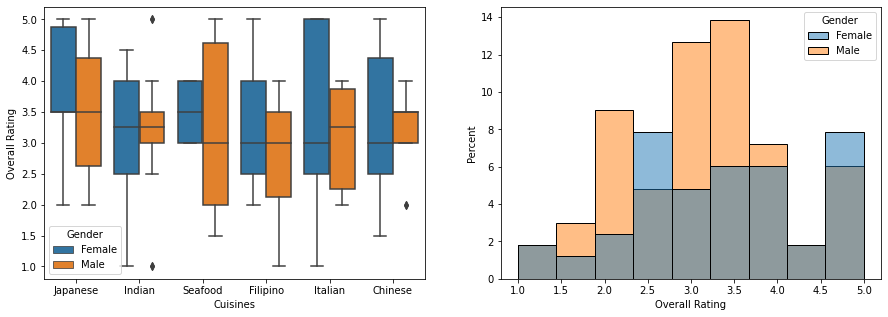

In [27]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(data = df2, y = "Overall Rating", x = "Cuisines", hue = "Gender",ax = ax[0])
sns.histplot(data = df2, x = "Overall Rating", ax = ax[1], hue = "Gender", stat='percent')

<AxesSubplot:xlabel='Overall Rating', ylabel='Percent'>

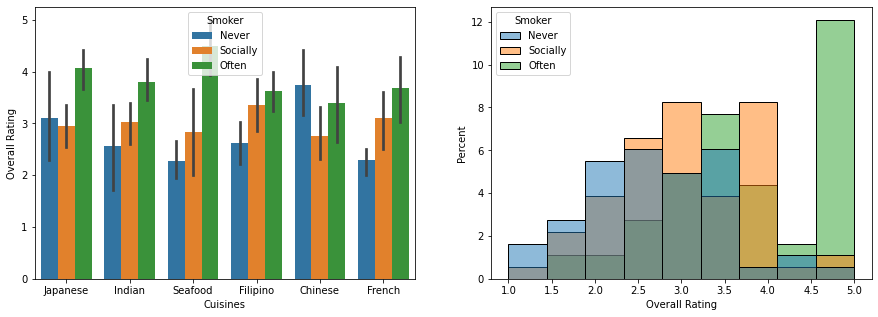

In [28]:
df2 = df[df["Cuisines"]!="Italian"]
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.barplot(data = df2, y = "Overall Rating", x = "Cuisines", hue = "Smoker", ax = ax[0])
sns.histplot(data = df2, x = "Overall Rating", ax = ax[1], hue = "Smoker", stat='percent')

# Q3

<AxesSubplot:xlabel='Overall Rating', ylabel='Percent'>

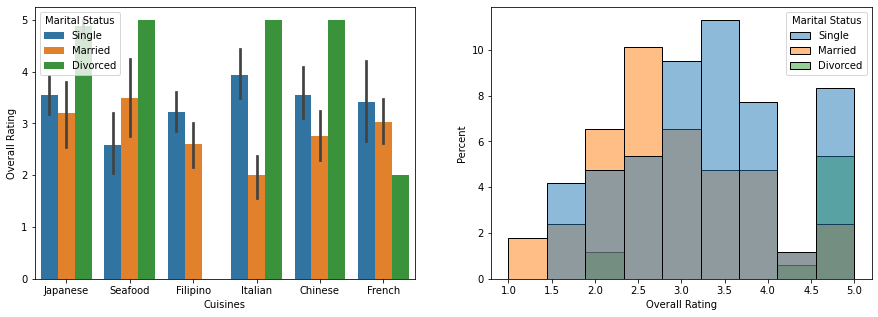

In [275]:
df2 = df[df["Cuisines"]!="Indian"]
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.barplot(data = df2, y = "Overall Rating", x = "Cuisines", hue = "Marital Status", ax = ax[0])
sns.histplot(data = df2, x = "Overall Rating", ax = ax[1], hue = "Marital Status", stat='percent')




# Q3

In [ ]:
df2 = df[(df["Activity"]== "Student") & (df["Gender"] == "Male") & (df["Smoker"] == "Often")]

In [39]:
df3 = df2.groupby(["Cuisines"])["Overall Rating"].mean().sort_values(ascending = False).to_frame().reset_index()
df3

,Cuisines,Overall Rating
0,Italian,4.000000
1,Japanese,3.892857
2,Seafood,3.833333
3,Chinese,3.500000
4,Indian,3.250000
5,French,3.000000


two options acceptable as a solution:

<AxesSubplot:xlabel='Cuisines', ylabel='Overall Rating'>

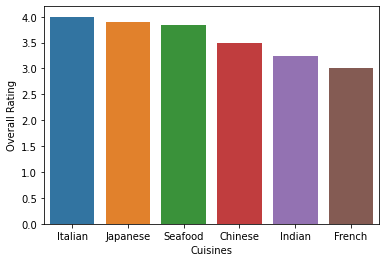

In [40]:
sns.barplot(data = df3, x = "Cuisines", y = "Overall Rating")

<AxesSubplot:xlabel='Cuisines', ylabel='Overall Rating'>

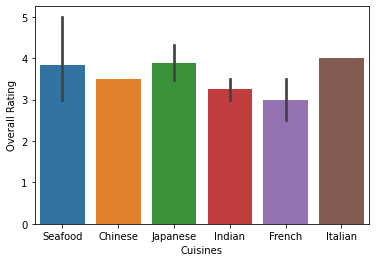

In [34]:
sns.barplot(data = df2, x = "Cuisines", y = "Overall Rating")

---

In [287]:
df2 = df[(df["Activity"]== "Professional") & (df["Gender"] == "Female") & (df["Area code"] == 123)]
df2

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
10,11,123,"St. George,NY",Female,1975,Married,Professional,4,French,Never,Often,3,2,2.5,No
12,13,123,"St. George,NY",Female,2006,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No
44,45,123,"St. George,NY",Female,1969,Married,Professional,3,Italian,Often,Never,4,1,2.5,No
95,96,123,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
97,98,123,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No


In [285]:
df2.groupby(["Cuisines"])["Overall Rating"].count().sort_values(ascending = False)

Cuisines
French      2
Chinese     1
Italian     1
Japanese    1
Name: Overall Rating, dtype: int64

<AxesSubplot:xlabel='Cuisines', ylabel='count'>

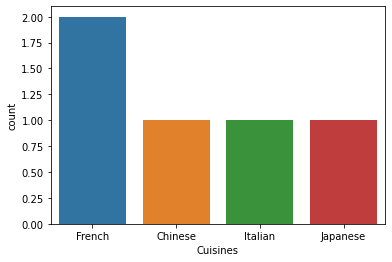

In [288]:
sns.countplot(data = df2, x = "Cuisines")

----

# Q4

In [224]:
features = ["Area code", "YOB", "Budget", "Food Rating", "Service Rating", "Overall Rating"]

In [290]:
df4 = df[df["Area code"] == 123]
correlation_matrix = df[features].corr().round(2)
correlation_matrix1 = df4[features].corr().round(2)

<AxesSubplot:>

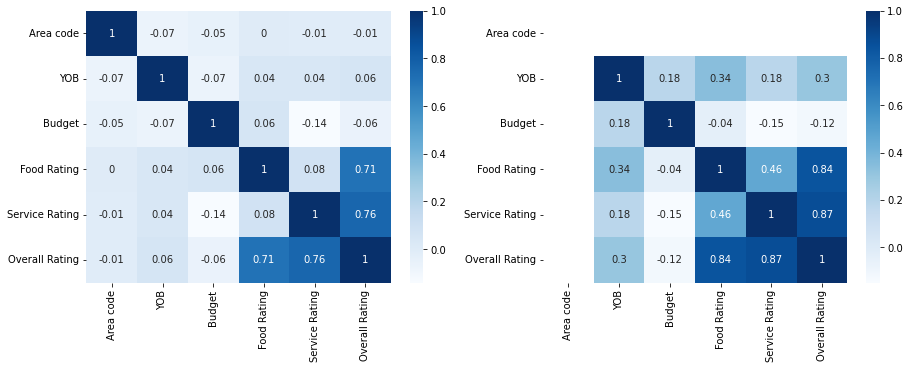

In [291]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.heatmap(data=correlation_matrix, cmap='Blues', annot = True, ax = ax[0])
sns.heatmap(data=correlation_matrix1, cmap='Blues', annot = True, ax = ax[1])

<AxesSubplot:xlabel='YOB', ylabel='Food Rating'>

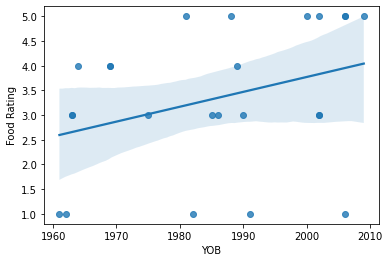

In [178]:
sns.regplot(data = df4, x="YOB", y = "Food Rating")

---

In [ ]:
df["Marital Status"].value_counts()

Single      100
Married      86
Divorced     14
Name: Marital Status, dtype: int64

In [292]:
df4 = df[df["Marital Status"] == "Single"]
correlation_matrix = df[features].corr().round(2)
correlation_matrix1 = df4[features].corr().round(2)

<AxesSubplot:>

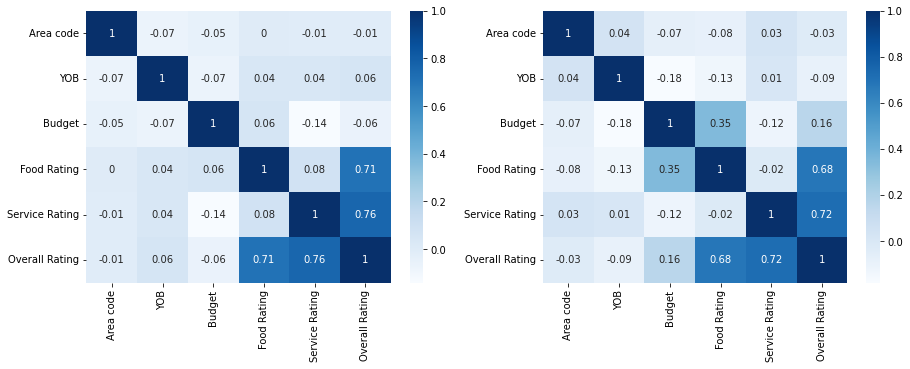

In [293]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.heatmap(data=correlation_matrix, cmap='Blues', annot = True, ax = ax[0])
sns.heatmap(data=correlation_matrix1, cmap='Blues', annot = True, ax = ax[1])

<AxesSubplot:xlabel='Budget', ylabel='Food Rating'>

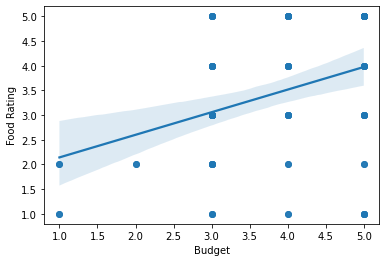

In [186]:
sns.regplot(data = df4, x="Budget", y = "Food Rating")

---
# GOOD LUCK !!!!
---

In [7]:
# do not type below this line